In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Video_Games.csv'
video_games_df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
video_games_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Checking for missing values
missing_values = video_games_df.isnull().sum()

# Checking data types
data_types = video_games_df.dtypes

# Checking for duplicates
duplicates = video_games_df.duplicated().sum()

missing_values

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [3]:
data_types

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [4]:
duplicates

0

In [5]:
# Handling missing values for columns with fewer missing values
# Dropping rows where 'Name', 'Year_of_Release', 'Genre', or 'Publisher' is missing
video_games_cleaned = video_games_df.dropna(subset=['Name', 'Year_of_Release', 'Genre', 'Publisher'])

# For columns with a large number of missing values, we will not drop them
# Instead, these could be dealt with during feature selection or model building

# First, replace 'tbd' with NaN
video_games_cleaned['User_Score'].replace('tbd', None, inplace=True)

# Convert 'User_Score' to numeric
video_games_cleaned['User_Score'] = pd.to_numeric(video_games_cleaned['User_Score'], errors='coerce')

# Recheck the dataset after cleaning
video_games_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Platform         16416 non-null  object 
 2   Year_of_Release  16416 non-null  float64
 3   Genre            16416 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
 10  Critic_Score     7982 non-null   float64
 11  Critic_Count     7982 non-null   float64
 12  User_Score       8608 non-null   float64
 13  User_Count       7461 non-null   float64
 14  Developer        9904 non-null   object 
 15  Rating           9767 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.1+ MB


<ipython-input-5-4361a35d7011>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_games_cleaned['User_Score'] = pd.to_numeric(video_games_cleaned['User_Score'], errors='coerce')


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# EDA to find interesting insights
eda_results = {}

# 1. Sales Trends over the Years
yearly_sales = video_games_cleaned.groupby('Year_of_Release')['Global_Sales'].sum()
eda_results['Yearly Sales Trend'] = yearly_sales

# 2. Top 10 Best-Selling Games
top_games = video_games_cleaned.sort_values('Global_Sales', ascending=False).head(10)[['Name', 'Global_Sales']]
eda_results['Top 10 Best-Selling Games'] = top_games

# 3. Sales Distribution by Genre
genre_sales = video_games_cleaned.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
eda_results['Sales by Genre'] = genre_sales

# 4. Sales Distribution by Platform
platform_sales = video_games_cleaned.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
eda_results['Sales by Platform'] = platform_sales

# 5. Average Critic Score by Genre
avg_critic_score_genre = video_games_cleaned.groupby('Genre')['Critic_Score'].mean().sort_values(ascending=False)
eda_results['Average Critic Score by Genre'] = avg_critic_score_genre

# 6. Average User Score by Genre
avg_user_score_genre = video_games_cleaned.groupby('Genre')['User_Score'].mean().sort_values(ascending=False)
eda_results['Average User Score by Genre'] = avg_user_score_genre

# 7. Correlation between Sales and Scores
correlation = video_games_cleaned[['Global_Sales', 'Critic_Score', 'User_Score']].corr()
eda_results['Correlation between Sales and Scores'] = correlation

# 8. Number of Games Released per Year
games_per_year = video_games_cleaned.groupby('Year_of_Release')['Name'].count()
eda_results['Games Released per Year'] = games_per_year

# 9. Top Publishers by Global Sales
top_publishers = video_games_cleaned.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
eda_results['Top Publishers by Sales'] = top_publishers

# 10. Sales Distribution by Region
regional_sales = video_games_cleaned[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
eda_results['Sales Distribution by Region'] = regional_sales

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# EDA to find interesting insights
eda_results = {}

# 1. Sales Trends over the Years
yearly_sales = video_games_cleaned.groupby('Year_of_Release')['Global_Sales'].sum()
eda_results['Yearly Sales Trend'] = yearly_sales

In [8]:
# 2. Top 10 Best-Selling Games
top_games = video_games_cleaned.sort_values('Global_Sales', ascending=False).head(10)[['Name', 'Global_Sales']]
eda_results['Top 10 Best-Selling Games'] = top_games

Text(0, 0.5, 'Global Sales (Millions)')

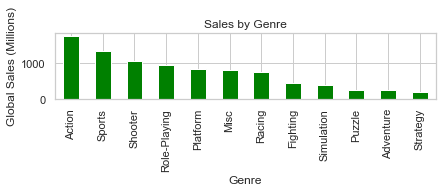

In [9]:
# 3. Sales Distribution by Genre
plt.figure(figsize=(15, 7))
plt.subplot(5, 2, 2)
video_games_df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Sales by Genre')
plt.ylabel('Global Sales (Millions)')

Text(0, 0.5, 'Global Sales (Millions)')

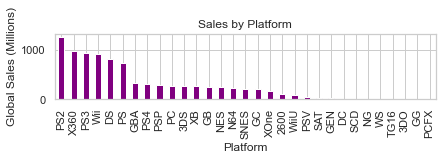

In [10]:
# 4. Sales Distribution by Platform
plt.figure(figsize=(15, 7))
plt.subplot(5, 2, 3)
video_games_df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title('Sales by Platform')
plt.ylabel('Global Sales (Millions)')

Text(0, 0.5, 'Average Critic Score')

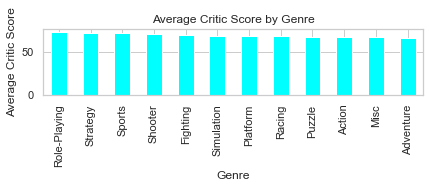

In [11]:
# 5. Average Critic Score by Genre
plt.figure(figsize=(15, 7))
plt.subplot(5, 2, 5)
video_games_df.groupby('Genre')['Critic_Score'].mean().sort_values(ascending=False).plot(kind='bar', color='cyan')
plt.title('Average Critic Score by Genre')
plt.ylabel('Average Critic Score')

Text(0, 0.5, 'Average User Score')

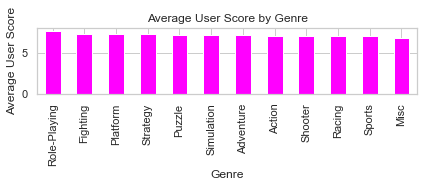

In [12]:
# 6. Average User Score by Genre
plt.figure(figsize=(15, 7))
plt.subplot(5, 2, 8)
video_games_df['User_Score'] = pd.to_numeric(video_games_df['User_Score'], errors='coerce')
video_games_df.groupby('Genre')['User_Score'].mean().sort_values(ascending=False).plot(kind='bar', color='magenta')
plt.title('Average User Score by Genre')
plt.ylabel('Average User Score')

Text(0.5, 1.0, 'Correlation Heatmap')

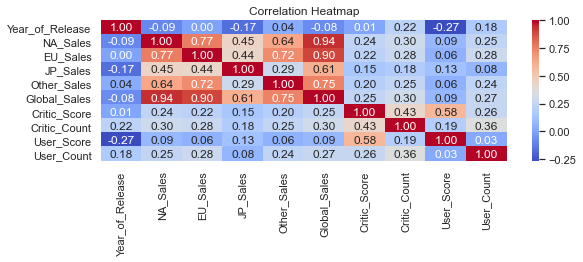

In [13]:
# 7. Correlation between Sales and Scores
plt.figure(figsize=(20, 15))
plt.subplot(5, 2, 9)
sns.heatmap(video_games_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')

In [14]:
# 8. Number of Games Released per Year
games_per_year = video_games_cleaned.groupby('Year_of_Release')['Name'].count()
eda_results['Games Released per Year'] = games_per_year

Text(0, 0.5, 'Global Sales (Millions)')

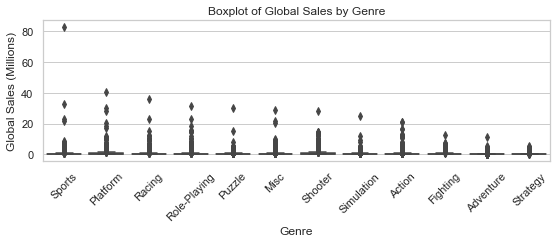

In [15]:
plt.figure(figsize=(20, 15))
plt.subplot(5, 2, 10)
sns.boxplot(x='Genre', y='Global_Sales', data=video_games_df)
plt.title('Boxplot of Global Sales by Genre')
plt.xticks(rotation=45)
plt.ylabel('Global Sales (Millions)')

Text(0, 0.5, 'Global Sales (Millions)')

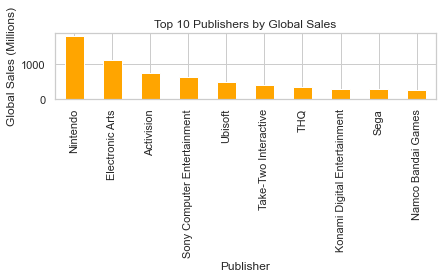

In [16]:
# 9. Top Publishers by Global Sales
plt.figure(figsize=(15, 7))
plt.subplot(5, 2, 4)
video_games_df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Publishers by Global Sales')
plt.ylabel('Global Sales (Millions)')

Text(0, 0.5, 'Sales (Millions)')

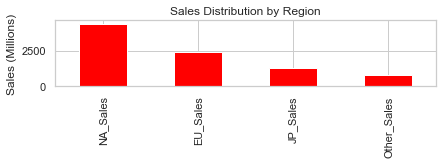

In [17]:
# 10. Sales Distribution by Region
plt.figure(figsize=(15, 7))
plt.subplot(5, 2, 6)
regional_sales = video_games_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
regional_sales.plot(kind='bar', color='red')
plt.title('Sales Distribution by Region')
plt.ylabel('Sales (Millions)')

Text(0, 0.5, 'Global Sales (Millions)')

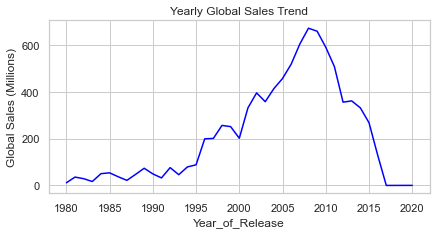

In [18]:
# Plotting some of the EDA results for better visualization
plt.figure(figsize=(15, 7))
plt.subplot(2, 2, 1)
yearly_sales.plot(kind='line', color='blue')
plt.title('Yearly Global Sales Trend')
plt.ylabel('Global Sales (Millions)')

Text(0, 0.5, 'Global Sales (Millions)')

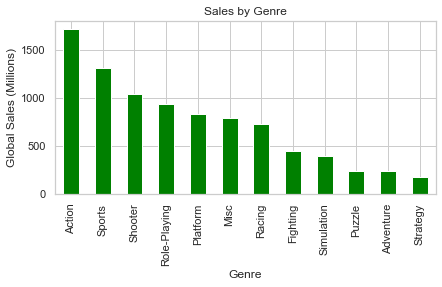

In [19]:
plt.figure(figsize=(15, 7))
plt.subplot(2, 2, 2)
genre_sales.plot(kind='bar', color='green')
plt.title('Sales by Genre')
plt.ylabel('Global Sales (Millions)')

Text(0, 0.5, 'Global Sales (Millions)')

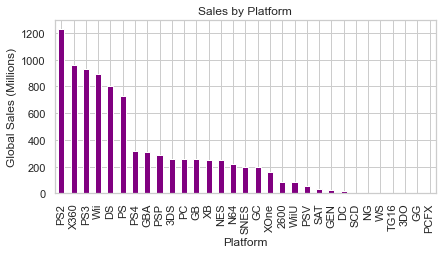

In [20]:
plt.figure(figsize=(15, 7))
plt.subplot(2, 2, 3)
platform_sales.plot(kind='bar', color='purple')
plt.title('Sales by Platform')
plt.ylabel('Global Sales (Millions)')

In [21]:
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [22]:
one_hot_encoded_data = pd.get_dummies(video_games_df, columns=['Platform', 'Genre', 'Publisher', 'Developer', 'Rating'])

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']:
    video_games_df[col] = label_encoder.fit_transform(video_games_df[col].astype(str))

In [24]:
# Impute missing values with the median
for column in ['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']:
    video_games_df[column].fillna(video_games_df[column].median(), inplace=True)

In [25]:
video_games_df['User_Score'] = pd.to_numeric(video_games_df['User_Score'], errors='coerce')

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
video_games_df[numerical_cols] = scaler.fit_transform(video_games_df[numerical_cols])

In [27]:
current_year = 2023  # You can set this to the current year or the year of interest
video_games_df['Game_Age'] = current_year - video_games_df['Year_of_Release']

In [28]:
avg_sales_publisher = video_games_df.groupby('Publisher')['Global_Sales'].transform('mean')
video_games_df['Avg_Sales_Publisher'] = avg_sales_publisher

In [29]:
video_games_df['Critic_Score_Binned'] = pd.cut(video_games_df['Critic_Score'], bins=[0, 50, 75, 100], labels=['Low', 'Medium', 'High'])

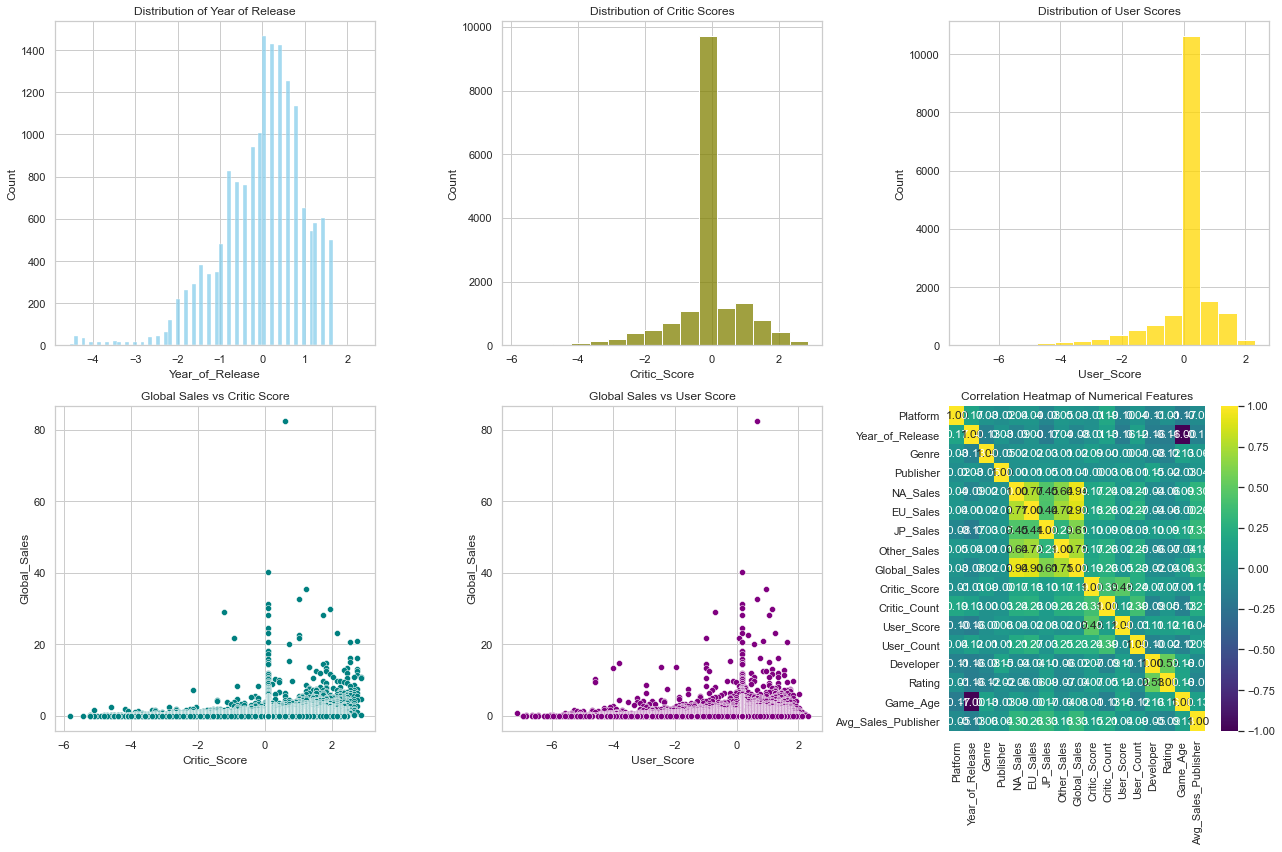

In [30]:
# Performing Exploratory Data Analysis (EDA) on numerical features

plt.figure(figsize=(18, 12))

# Histogram of Year_of_Release
plt.subplot(2, 3, 1)
sns.histplot(video_games_df['Year_of_Release'], kde=False, color='skyblue')
plt.title('Distribution of Year of Release')

# Histogram of Critic_Score
plt.subplot(2, 3, 2)
sns.histplot(video_games_df['Critic_Score'].dropna(), kde=False, color='olive')
plt.title('Distribution of Critic Scores')

# Histogram of User_Score
plt.subplot(2, 3, 3)
# Converting User_Score to numeric for the histogram
video_games_df['User_Score'] = pd.to_numeric(video_games_df['User_Score'], errors='coerce')
sns.histplot(video_games_df['User_Score'].dropna(), kde=False, color='gold')
plt.title('Distribution of User Scores')

# Scatter Plot of Global Sales vs Critic Score
plt.subplot(2, 3, 4)
sns.scatterplot(x='Critic_Score', y='Global_Sales', data=video_games_df, color='teal')
plt.title('Global Sales vs Critic Score')

# Scatter Plot of Global Sales vs User Score
plt.subplot(2, 3, 5)
sns.scatterplot(x='User_Score', y='Global_Sales', data=video_games_df, color='purple')
plt.title('Global Sales vs User Score')

# Correlation Heatmap of Numerical Features
plt.subplot(2, 3, 6)
sns.heatmap(video_games_df.corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Heatmap of Numerical Features')

plt.tight_layout()
plt.show()

In [31]:
from sklearn.impute import SimpleImputer

# Creating imputers for numerical and categorical data
num_imputer = SimpleImputer(strategy='median')  # For numerical columns
cat_imputer = SimpleImputer(strategy='most_frequent')  # For categorical columns

# Identifying numerical and categorical columns
numerical_cols = video_games_df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = video_games_df.select_dtypes(include=['object']).columns

# Applying imputation
video_games_df[numerical_cols] = num_imputer.fit_transform(video_games_df[numerical_cols])
video_games_df[categorical_cols] = cat_imputer.fit_transform(video_games_df[categorical_cols])

# Checking the dataset after imputation
video_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Name                 16719 non-null  object  
 1   Platform             16719 non-null  int32   
 2   Year_of_Release      16719 non-null  float64 
 3   Genre                16719 non-null  int32   
 4   Publisher            16719 non-null  int32   
 5   NA_Sales             16719 non-null  float64 
 6   EU_Sales             16719 non-null  float64 
 7   JP_Sales             16719 non-null  float64 
 8   Other_Sales          16719 non-null  float64 
 9   Global_Sales         16719 non-null  float64 
 10  Critic_Score         16719 non-null  float64 
 11  Critic_Count         16719 non-null  float64 
 12  User_Score           16719 non-null  float64 
 13  User_Count           16719 non-null  float64 
 14  Developer            16719 non-null  int32   
 15  Rating             

In [32]:
# Convert 'Platform' and 'Genre' columns to standard strings (if they are not already)
video_games_df['Platform'] = video_games_df['Platform'].astype(str)
video_games_df['Genre'] = video_games_df['Genre'].astype(str)

# Now create the 'Platform_Genre' interaction feature
video_games_df['Platform_Genre'] = video_games_df['Platform'] + "_" + video_games_df['Genre']

In [33]:
# Feature Engineering for the dataset

# Convert 'User_Score' to a numerical format
video_games_df['User_Score'] = pd.to_numeric(video_games_df['User_Score'], errors='coerce')

# Creating a new feature 'Game_Age' representing the age of the game at the time of prediction
current_year = 2023
video_games_df['Game_Age'] = current_year - video_games_df['Year_of_Release']

# Creating interaction features such as combining Platform and Genre
video_games_df['Platform_Genre'] = video_games_df['Platform'] + "_" + video_games_df['Genre']

# Creating aggregated features like average critic score by publisher
publisher_avg_critic_score = video_games_df.groupby('Publisher')['Critic_Score'].transform('mean')
video_games_df['Avg_Critic_Score_Publisher'] = publisher_avg_critic_score

# Creating a feature representing the total sales in all regions except Global
video_games_df['Total_Regional_Sales'] = video_games_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)

# Display the first few rows of the updated dataset
video_games_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,User_Score,User_Count,Developer,Rating,Game_Age,Avg_Sales_Publisher,Critic_Score_Binned,Platform_Genre,Avg_Critic_Score_Publisher,Total_Regional_Sales
0,Wii Sports,26,-0.084985,10,361,41.36,28.96,3.77,8.45,82.53,...,0.652155,0.612040,1020,1,2023.084985,2.533725,Low,26_10,0.304455,82.54
1,Super Mario Bros.,11,-3.686001,4,361,29.08,3.58,6.81,0.77,40.24,...,0.165632,-0.163264,1690,8,2026.686001,2.533725,Low,11_4,0.304455,40.24
2,Mario Kart Wii,26,0.257969,6,361,15.68,12.76,3.79,3.29,35.52,...,0.944069,1.618895,1020,1,2022.742031,2.533725,Low,26_6,0.304455,35.52
3,Wii Sports Resort,26,0.429446,10,361,15.61,10.93,3.28,2.95,32.77,...,0.652155,0.273821,1020,1,2022.570554,2.533725,Low,26_10,0.304455,32.77
4,Pokemon Red/Pokemon Blue,5,-1.799754,7,361,11.27,8.89,10.22,1.00,31.37,...,0.165632,-0.163264,1690,8,2024.799754,2.533725,Low,5_7,0.304455,31.38


In [34]:
# Saving the updated DataFrame to a CSV file
output_file_path = 'updated_video_games.csv'
video_games_df.to_csv(output_file_path, index=False)

output_file_path

'updated_video_games.csv'

In [35]:
video_games_df.dtypes

Name                            object
Platform                        object
Year_of_Release                float64
Genre                           object
Publisher                        int32
NA_Sales                       float64
EU_Sales                       float64
JP_Sales                       float64
Other_Sales                    float64
Global_Sales                   float64
Critic_Score                   float64
Critic_Count                   float64
User_Score                     float64
User_Count                     float64
Developer                        int32
Rating                           int32
Game_Age                       float64
Avg_Sales_Publisher            float64
Critic_Score_Binned           category
Platform_Genre                  object
Avg_Critic_Score_Publisher     float64
Total_Regional_Sales           float64
dtype: object

In [36]:
updated_video_games_df = video_games_df

In [37]:
# Converting certain columns to integers
updated_video_games_df['Year_of_Release'] = updated_video_games_df['Year_of_Release'].astype(int)
updated_video_games_df['Critic_Count'] = updated_video_games_df['Critic_Count'].astype(int)
updated_video_games_df['User_Count'] = updated_video_games_df['User_Count'].astype(int)

# Converting 'Critic_Score_Binned' to categorical numerical type
# First, let's see the unique values in this column
unique_binned_scores = updated_video_games_df['Critic_Score_Binned'].unique()
unique_binned_scores

['Low', NaN]
Categories (1, object): ['Low']

In [38]:
# Treating 'nan' as a separate category in 'Critic_Score_Binned'
score_mapping = {'Low': 0, 'nan': -1}
updated_video_games_df['Critic_Score_Binned'] = updated_video_games_df['Critic_Score_Binned'].map(lambda x: score_mapping.get(x, -1))

# Verifying the changes
updated_video_games_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,User_Score,User_Count,Developer,Rating,Game_Age,Avg_Sales_Publisher,Critic_Score_Binned,Platform_Genre,Avg_Critic_Score_Publisher,Total_Regional_Sales
0,Wii Sports,26,0,10,361,41.36,28.96,3.77,8.45,82.53,...,0.652155,0,1020,1,2023.084985,2.533725,0.0,26_10,0.304455,82.54
1,Super Mario Bros.,11,-3,4,361,29.08,3.58,6.81,0.77,40.24,...,0.165632,0,1690,8,2026.686001,2.533725,0.0,11_4,0.304455,40.24
2,Mario Kart Wii,26,0,6,361,15.68,12.76,3.79,3.29,35.52,...,0.944069,1,1020,1,2022.742031,2.533725,0.0,26_6,0.304455,35.52
3,Wii Sports Resort,26,0,10,361,15.61,10.93,3.28,2.95,32.77,...,0.652155,0,1020,1,2022.570554,2.533725,0.0,26_10,0.304455,32.77
4,Pokemon Red/Pokemon Blue,5,-1,7,361,11.27,8.89,10.22,1.00,31.37,...,0.165632,0,1690,8,2024.799754,2.533725,0.0,5_7,0.304455,31.38


In [39]:
# Checking for redundancy by examining correlations between features
correlation_matrix = updated_video_games_df.corr()

# Displaying the correlation matrix
correlation_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\vishi\anaconda3\lib\site-packages\pandas\io\formats\style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\vishi\anaconda3\lib\site-packages\pandas\io\formats\style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Year_of_Release,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Game_Age,Avg_Sales_Publisher,Critic_Score_Binned,Avg_Critic_Score_Publisher,Total_Regional_Sales
Year_of_Release,1.00,0.04,-0.10,0.01,-0.18,0.03,-0.08,-0.00,0.07,-0.11,0.07,-0.20,-0.19,-0.88,-0.11,nan,-0.04,-0.08
Publisher,0.04,1.00,0.00,0.01,0.05,0.01,0.01,-0.00,0.02,0.06,0.01,0.15,-0.02,-0.03,0.04,nan,-0.00,0.01
NA_Sales,-0.10,0.00,1.00,0.77,0.45,0.64,0.94,0.17,0.24,0.04,0.18,-0.04,-0.06,0.09,0.30,nan,0.13,0.94
EU_Sales,0.01,0.01,0.77,1.00,0.44,0.72,0.90,0.18,0.26,0.02,0.24,-0.04,-0.06,-0.00,0.26,nan,0.13,0.90
JP_Sales,-0.18,0.05,0.45,0.44,1.00,0.29,0.61,0.10,0.10,0.08,0.02,0.10,0.09,0.17,0.33,nan,0.13,0.61
Other_Sales,0.03,0.01,0.64,0.72,0.29,1.00,0.75,0.17,0.25,0.02,0.22,-0.06,-0.07,-0.04,0.18,nan,0.12,0.75
Global_Sales,-0.08,0.01,0.94,0.90,0.61,0.75,1.00,0.19,0.26,0.05,0.20,-0.02,-0.04,0.08,0.33,nan,0.15,1.00
Critic_Score,-0.00,-0.00,0.17,0.18,0.10,0.17,0.19,1.00,0.38,0.48,0.20,0.07,0.07,0.01,0.15,nan,0.32,0.19
Critic_Count,0.07,0.02,0.24,0.26,0.10,0.25,0.26,0.38,1.00,0.12,0.33,-0.06,0.06,-0.12,0.20,nan,0.21,0.26
User_Score,-0.11,0.06,0.04,0.02,0.08,0.02,0.05,0.48,0.12,1.00,-0.01,0.11,0.12,0.16,0.04,nan,0.10,0.05


In [40]:
updated_video_games_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,User_Score,User_Count,Developer,Rating,Game_Age,Avg_Sales_Publisher,Critic_Score_Binned,Platform_Genre,Avg_Critic_Score_Publisher,Total_Regional_Sales
0,Wii Sports,26,0,10,361,41.36,28.96,3.77,8.45,82.53,...,0.652155,0,1020,1,2023.084985,2.533725,0.0,26_10,0.304455,82.54
1,Super Mario Bros.,11,-3,4,361,29.08,3.58,6.81,0.77,40.24,...,0.165632,0,1690,8,2026.686001,2.533725,0.0,11_4,0.304455,40.24
2,Mario Kart Wii,26,0,6,361,15.68,12.76,3.79,3.29,35.52,...,0.944069,1,1020,1,2022.742031,2.533725,0.0,26_6,0.304455,35.52
3,Wii Sports Resort,26,0,10,361,15.61,10.93,3.28,2.95,32.77,...,0.652155,0,1020,1,2022.570554,2.533725,0.0,26_10,0.304455,32.77
4,Pokemon Red/Pokemon Blue,5,-1,7,361,11.27,8.89,10.22,1.00,31.37,...,0.165632,0,1690,8,2024.799754,2.533725,0.0,5_7,0.304455,31.38


In [41]:
updated_video_games_df["Name"].nunique()

11562

In [42]:
game_names = updated_video_games_df['Name']
updated_video_games_df = updated_video_games_df.drop('Name', axis=1)

In [43]:
from sklearn.model_selection import train_test_split

# Defining the features and target variable
X = updated_video_games_df.drop('Global_Sales', axis=1)  # or any other columns to drop
y = updated_video_games_df['Global_Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
# Imputing NaN values in the training and testing sets

# Creating imputers for numerical and categorical data
# We will use the median for numerical features and the most frequent value for categorical features
num_imputer = SimpleImputer(strategy='median')  # For numerical columns
cat_imputer = SimpleImputer(strategy='most_frequent')  # For categorical columns

# Separating numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Applying imputation
X_train[numerical_cols] = num_imputer.fit_transform(X_train[numerical_cols])
X_train[categorical_cols] = cat_imputer.fit_transform(X_train[categorical_cols])

X_test[numerical_cols] = num_imputer.transform(X_test[numerical_cols])
X_test[categorical_cols] = cat_imputer.transform(X_test[categorical_cols])

# Checking if NaN values are handled
nan_in_train_after = X_train.isna().sum().sum()
nan_in_test_after = X_test.isna().sum().sum()

(nan_in_train_after, nan_in_test_after)

<ipython-input-44-9f5230bda4d4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_cols] = num_imputer.fit_transform(X_train[numerical_cols])
C:\Users\vishi\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-44-9f5230bda4d4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

(0, 0)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Building the Linear Regression model
linear_model = LinearRegression()

# Training the model on the training data
linear_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluating the model
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse_linear)
print("R-squared:", r2_linear)

Mean Squared Error: 2.7356726283661965e-05
R-squared: 0.9999913600266269


### Model performance after removing outliers

In [47]:
# Selecting key numerical features for outlier analysis
numerical_features = ['Year_of_Release', 'Global_Sales', 'Critic_Score', 'User_Score', 'User_Count']

# Creating an empty dictionary to store outlier indices for each feature
outliers_indices = {}

for feature in numerical_features:
    # Calculating Q1 (25th percentile) and Q3 (75th percentile) of the feature
    Q1 = updated_video_games_df[feature].quantile(0.25)
    Q3 = updated_video_games_df[feature].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range

    # Determining outliers using IQR (1.5 times IQR from Q1 and Q3)
    outlier_condition = ((updated_video_games_df[feature] < (Q1 - 1.5 * IQR)) | 
                         (updated_video_games_df[feature] > (Q3 + 1.5 * IQR)))
    outliers_indices[feature] = updated_video_games_df[outlier_condition].index.tolist()

# Displaying the count of outliers detected for each feature
outlier_counts = {feature: len(indices) for feature, indices in outliers_indices.items()}
outlier_counts

{'Year_of_Release': 4563,
 'Global_Sales': 1892,
 'Critic_Score': 7883,
 'User_Score': 7339,
 'User_Count': 562}

In [48]:
updated_video_games_df.shape

(16719, 21)

In [49]:
# Selecting key numerical features for outlier removal
numerical_features = ['Year_of_Release', 'Global_Sales', 'Critic_Score', 'User_Score', 'User_Count']

# Identifying outlier indices for removal
outlier_indices_to_remove = []

for feature in numerical_features:
    # Calculating Q1 (25th percentile) and Q3 (75th percentile) of the feature
    Q1 = updated_video_games_df[feature].quantile(0.25)
    Q3 = updated_video_games_df[feature].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range

    # Determining outlier indices
    outlier_condition = ((updated_video_games_df[feature] < (Q1 - 1.5 * IQR)) | 
                         (updated_video_games_df[feature] > (Q3 + 1.5 * IQR)))
    outlier_indices = updated_video_games_df[outlier_condition].index
    outlier_indices_to_remove.extend(outlier_indices)

# Removing duplicates from the list of indices to remove
outlier_indices_to_remove = list(set(outlier_indices_to_remove))

# Removing the outliers from the dataset
cleaned_video_games_df = updated_video_games_df.drop(outlier_indices_to_remove)

# Displaying the final shape of the dataset after outlier removal
cleaned_video_games_df.shape

(4771, 21)

In [50]:
import pandas as pd
# Save the cleaned dataset
cleaned_video_games_df.to_csv('cleaned_video_games_df.csv')

# Print the shape of the cleaned dataset
print(cleaned_video_games_df.shape)

(4771, 21)


In [51]:
cleaned_video_games_df.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,...,User_Score,User_Count,Developer,Rating,Game_Age,Avg_Sales_Publisher,Critic_Score_Binned,Platform_Genre,Avg_Critic_Score_Publisher,Total_Regional_Sales
1894,4,0,9,528,0.63,0.35,0.0,0.10,1.08,0.101177,...,0.165632,0,1607,1,2022.742031,0.505477,0.0,4_9,-0.050888,1.08
1896,16,0,10,27,0.53,0.41,0.0,0.14,1.08,0.101177,...,0.165632,0,1598,1,2023.770892,0.242500,0.0,16_10,0.139536,1.08
1900,17,0,0,127,0.51,0.40,0.0,0.16,1.08,0.101177,...,0.165632,0,1690,8,2022.399077,0.538394,0.0,17_0,-0.214611,1.07
1909,6,0,4,528,0.77,0.29,0.0,0.02,1.08,0.101177,...,0.165632,0,1690,8,2023.770892,0.505477,0.0,6_4,-0.050888,1.08
1917,4,0,9,528,0.65,0.32,0.0,0.10,1.07,0.101177,...,0.165632,0,847,1,2022.742031,0.505477,0.0,4_9,-0.050888,1.07


In [52]:
# Defining the features and target variable
X = cleaned_video_games_df.drop('Global_Sales', axis=1)  # or any other columns to drop
y = cleaned_video_games_df['Global_Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define a range of 'alpha' values for Ridge Regression
alpha_values = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize the Ridge Regression model
ridge_model = Ridge()

# Grid Search for Hyperparameter Tuning with Cross-Validation
grid_search = GridSearchCV(estimator=ridge_model, param_grid=alpha_values, 
                           scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameter value
best_alpha = grid_search.best_params_['alpha']

# Train the model with the best 'alpha'
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train)

# Make predictions
y_pred = best_ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred)

print("Best Alpha:", best_alpha)
print("Mean Squared Error:", mse_ridge)
print("R-squared:", r2_ridge)

Best Alpha: 0.001
Mean Squared Error: 1.985368232469196e-05
R-squared: 0.9994600843437093


In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Defining the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Grid Search for Hyperparameter Tuning with Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   40.7s finished


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Mean Squared Error: 2.1101652653567878e-05
R-squared: 0.9994261461196495


## Applying PCA to reduce dimensionality 

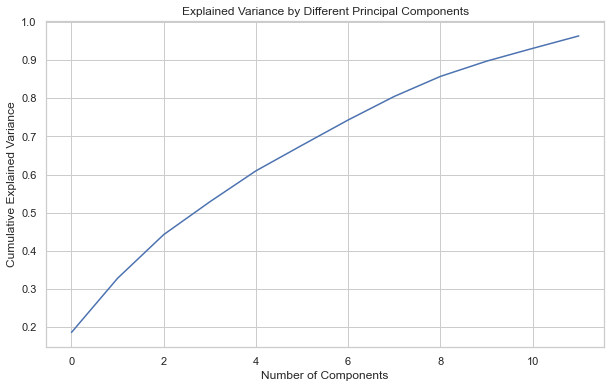

In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Replace X with your feature set

# Applying PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Plotting the Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.grid(True)
plt.show()

In [58]:
from sklearn.model_selection import train_test_split

# Assuming X_pca is your PCA-transformed data and y is your target variable
# Split the data into training (70%) and testing sets (30%)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Print the shapes of the splits
print("X_pca_train shape:", X_pca_train.shape)
print("X_pca_test shape:", X_pca_test.shape)
print("y_pca_train shape:", y_pca_train.shape)
print("y_pca_test shape:", y_pca_test.shape)

X_pca_train shape: (3339, 12)
X_pca_test shape: (1432, 12)
y_pca_train shape: (3339,)
y_pca_test shape: (1432,)


In [59]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your data is already split and PCA-transformed
# Reshape data for LSTM: [samples, time steps, features]
X_pca_train_reshaped = X_pca_train.reshape((X_pca_train.shape[0], 1, X_pca_train.shape[1]))
X_pca_test_reshaped = X_pca_test.reshape((X_pca_test.shape[0], 1, X_pca_test.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(1, X_pca_train.shape[1])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_pca_train_reshaped, y_pca_train, epochs=100, batch_size=32)

# Make predictions
y_pred = model.predict(X_pca_test_reshaped)

# Calculate MSE and R-squared
mse = mean_squared_error(y_pca_test, y_pred)
r2 = r2_score(y_pca_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Epoch 1/100
105/105 [==============================] - 1s 1ms/step - loss: 0.0423
Epoch 2/100
105/105 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 3/100
105/105 [==============================] - 0s 1ms/step - loss: 8.8979e-04
Epoch 4/100
105/105 [==============================] - 0s 1ms/step - loss: 4.6813e-04
Epoch 5/100
105/105 [==============================] - 0s 1ms/step - loss: 2.6870e-04
Epoch 6/100
105/105 [==============================] - 0s 1ms/step - loss: 2.3097e-04
Epoch 7/100
105/105 [==============================] - 0s 1ms/step - loss: 1.6580e-04
Epoch 8/100
105/105 [==============================] - 0s 1ms/step - loss: 1.2967e-04
Epoch 9/100
105/105 [==============================] - 0s 1ms/step - loss: 1.1430e-04A: 0s - loss: 1.1238e-
Epoch 10/100
105/105 [==============================] - 0s 1ms/step - loss: 1.1429e-04
Epoch 11/100
105/105 [==============================] - 0s 1ms/step - loss: 1.4875e-04
Epoch 12/100
105/105 [================

105/105 [==============================] - 0s 1ms/step - loss: 2.0120e-05
Epoch 96/100
105/105 [==============================] - 0s 1ms/step - loss: 3.2910e-05
Epoch 97/100
105/105 [==============================] - 0s 1ms/step - loss: 2.1282e-05
Epoch 98/100
105/105 [==============================] - 0s 1ms/step - loss: 2.0463e-05
Epoch 99/100
105/105 [==============================] - 0s 1ms/step - loss: 2.1835e-05
Epoch 100/100
105/105 [==============================] - 0s 989us/step - loss: 2.0236e-05
Mean Squared Error: 5.7384487222807636e-05
R-squared: 0.9984394439997019


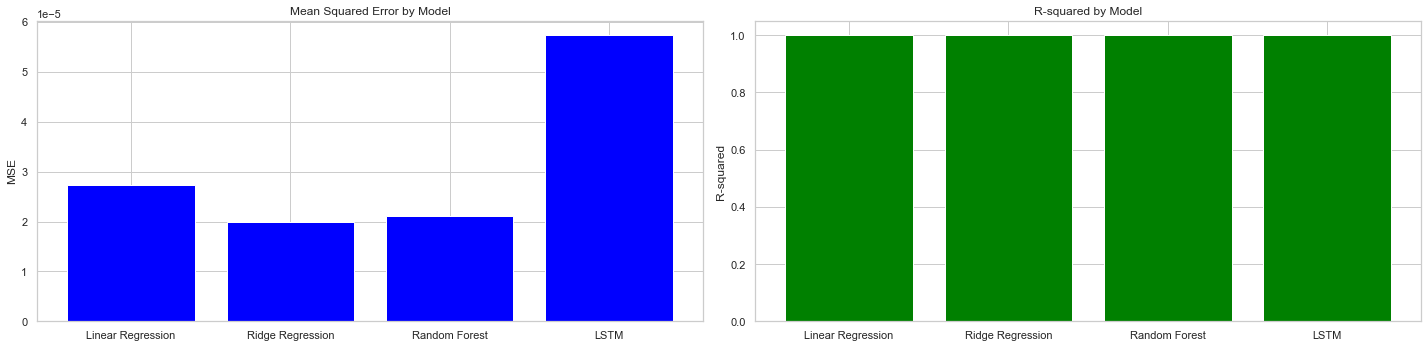

In [61]:
import matplotlib.pyplot as plt

# Example data
models = ['Linear Regression', 'Ridge Regression', 'Random Forest', "LSTM"]
mse_values = [mse_linear, mse_ridge, mse_rf, mse]  # Replace with your MSE values
r2_values = [r2_linear, r2_ridge, r2_rf, r2]  # Replace with your R2 values

# Plotting
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color='blue')
plt.title('Mean Squared Error by Model')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color='green')
plt.title('R-squared by Model')
plt.ylabel('R-squared')

plt.tight_layout()
plt.show()